<a href="https://colab.research.google.com/github/neha23nov/health-insurance-ml-pipeline/blob/main/Week1_ML_Pipeline_HealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Load Data **

In [2]:
df.info()
df.describe()
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Explore Data**

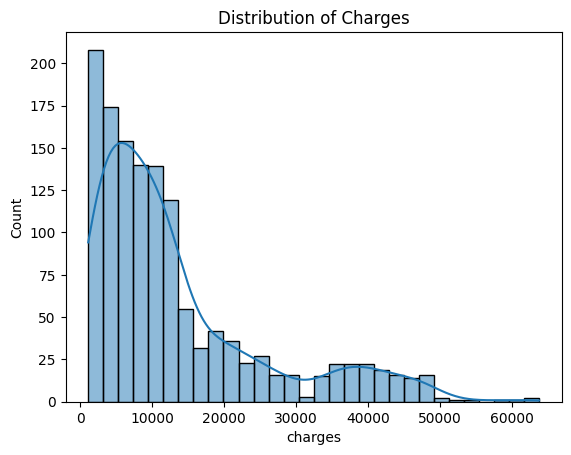

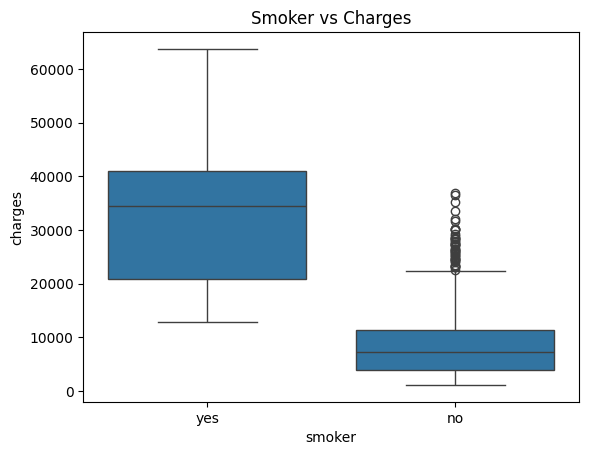

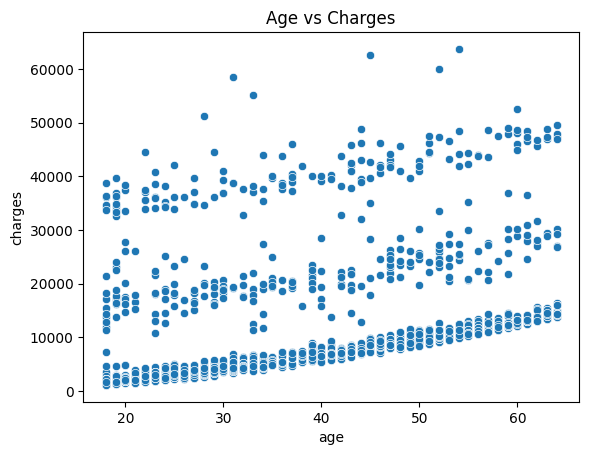

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()


**Visualize Patterns**

In [4]:
# Convert categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


**Prepare Features**

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Model**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 33596915.85
R2 Score: 0.78


**Evaluate Results**

In [8]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance


,Feature,Coefficient
4,smoker_yes,23651.128856
7,region_southwest,-809.799354
6,region_southeast,-657.864297
2,children,425.278784
5,region_northwest,-370.677326
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest - MSE: 22176631.50, R2: 0.86


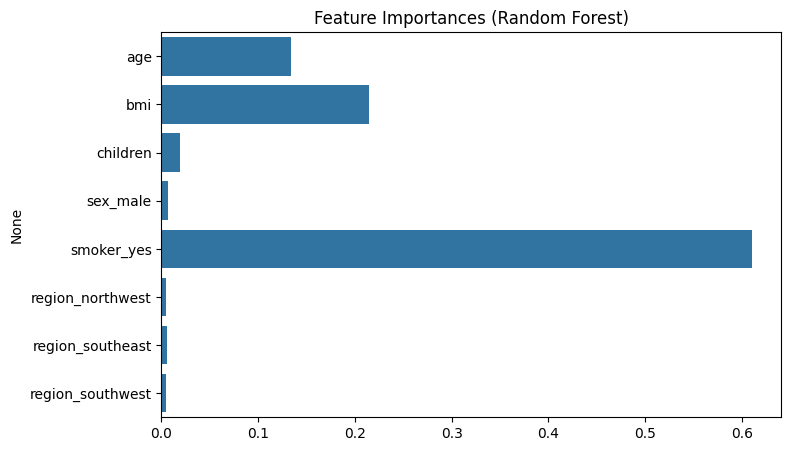

In [13]:
importances = rf_model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances (Random Forest)")
plt.show()


**Smoker status and BMI were strong predictors of charges. The Random Forest model gave better results than Linear Regression.
**

** Final Insights

- The dataset shows strong correlations between smoking status and medical charges.
- Linear Regression achieved an R² of ~0.78, while Random Forest improved to ~0.86.
- Feature importance and visualization confirmed that **smoker** and **BMI** are major cost drivers.
- In production, Random Forest would be a better choice for deployment due to its higher accuracy.

##  What I Learned
- How to preprocess categorical features using one-hot encoding
- How to train and evaluate basic regression models
- How to visualize relationships in the data
- How to build a clean ML pipeline from scratch
